# Data Science Internship - INSAID

## This Project is for  customer churn prediction
### Problem statement : Can you accurately predict the churn?

    Now, because lots of customers are leaving from a fictitious wireless telecom company, so as part of customer retention program we need to predict customer churn before they decide to leave.
    In order to do that we need to use this data and create machine learning model for customer churn prediction.
    
### Candidate Name : Jeyanthi P
### Phone Number    : +91 9986560604
### Email Id                : jeyanthin20@gmail.com

# Basic Imports

In [1]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Reading Data

In [2]:
# Reading the given file and basic checks
df = pd.read_excel("Churn.xlsx")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# from the info() method we can find out which how much columns in the dataset and which columns are of which datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# these shape tell us the dataset contains count of  rows and columns 
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Statistical Info about data	

In [7]:
# Describing statistical information
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# checking the missing values in the dataset

In [8]:
# there is no null values in the dataset 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# Treating Missing values
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# checking the duplicate data

In [11]:
duplicate= df.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [12]:
df.duplicated().sum()

0

In [13]:
num_data=df.select_dtypes(exclude=object)

In [14]:
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [15]:
obj_data=df.select_dtypes(include=['object'])

In [16]:
obj_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


# checking the distribution of the data


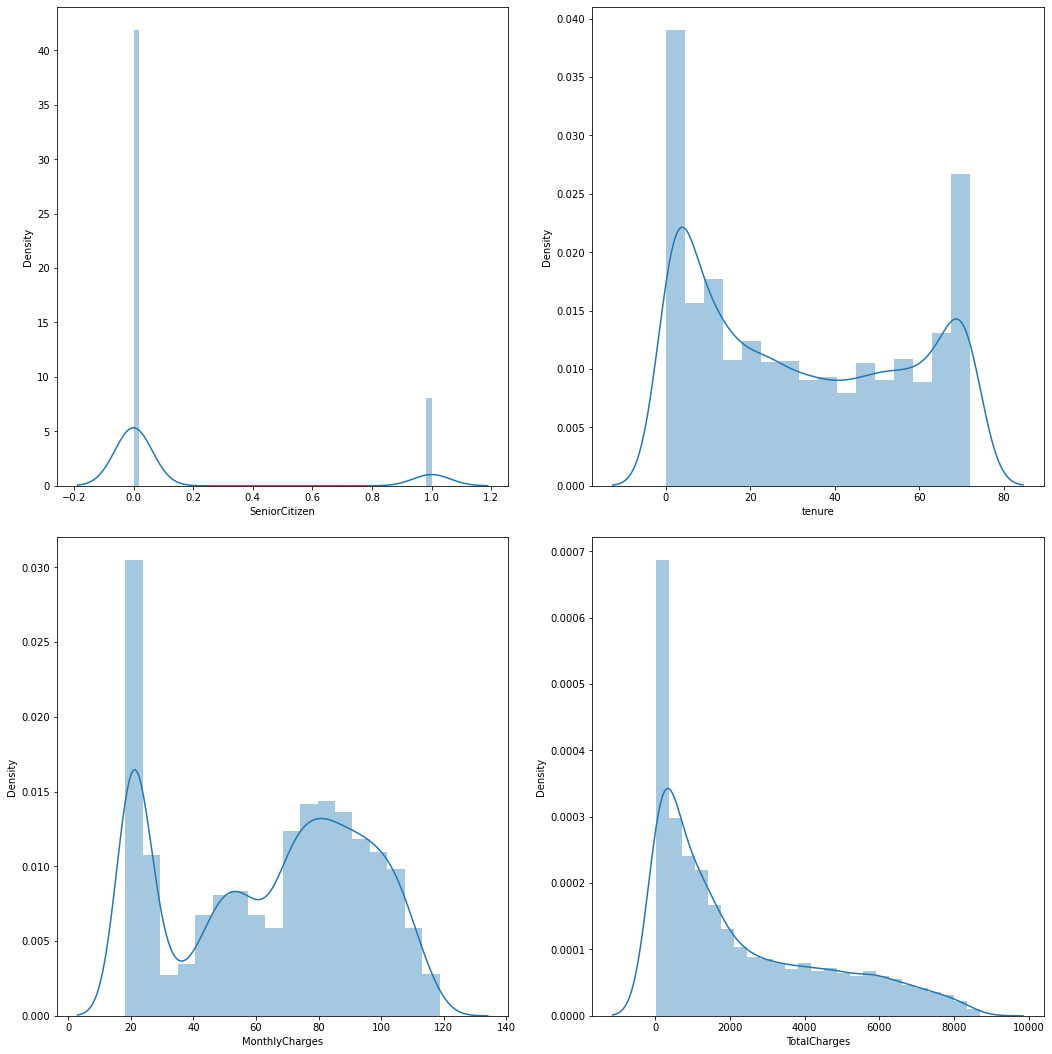

In [17]:
import seaborn as sns
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
  plt.subplot(2,2,index+1)
  sns.distplot(df.loc[:,cols],)
plt.tight_layout(pad=2)

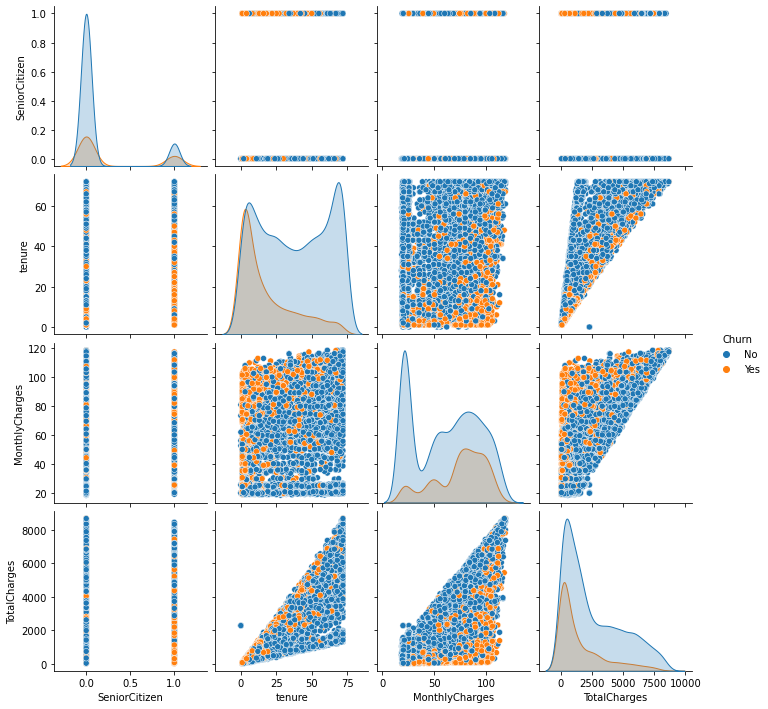

In [18]:
sns.pairplot(df,hue='Churn')

In [19]:
cat_features = df.select_dtypes(include='object')

# checking the skewness of the numerical data

In [20]:
from scipy.stats import skew
for i in num_data:
  print(i,'=',num_data[i].skew())
print('\033[1mRange of skewness, S < |1.96|')

SeniorCitizen = 1.8336327440928564
tenure = 0.2395397495619829
MonthlyCharges = -0.22052443394398033
TotalCharges = 0.9623940229874866
Range of skewness, S < |1.96|


# Checking Outliers

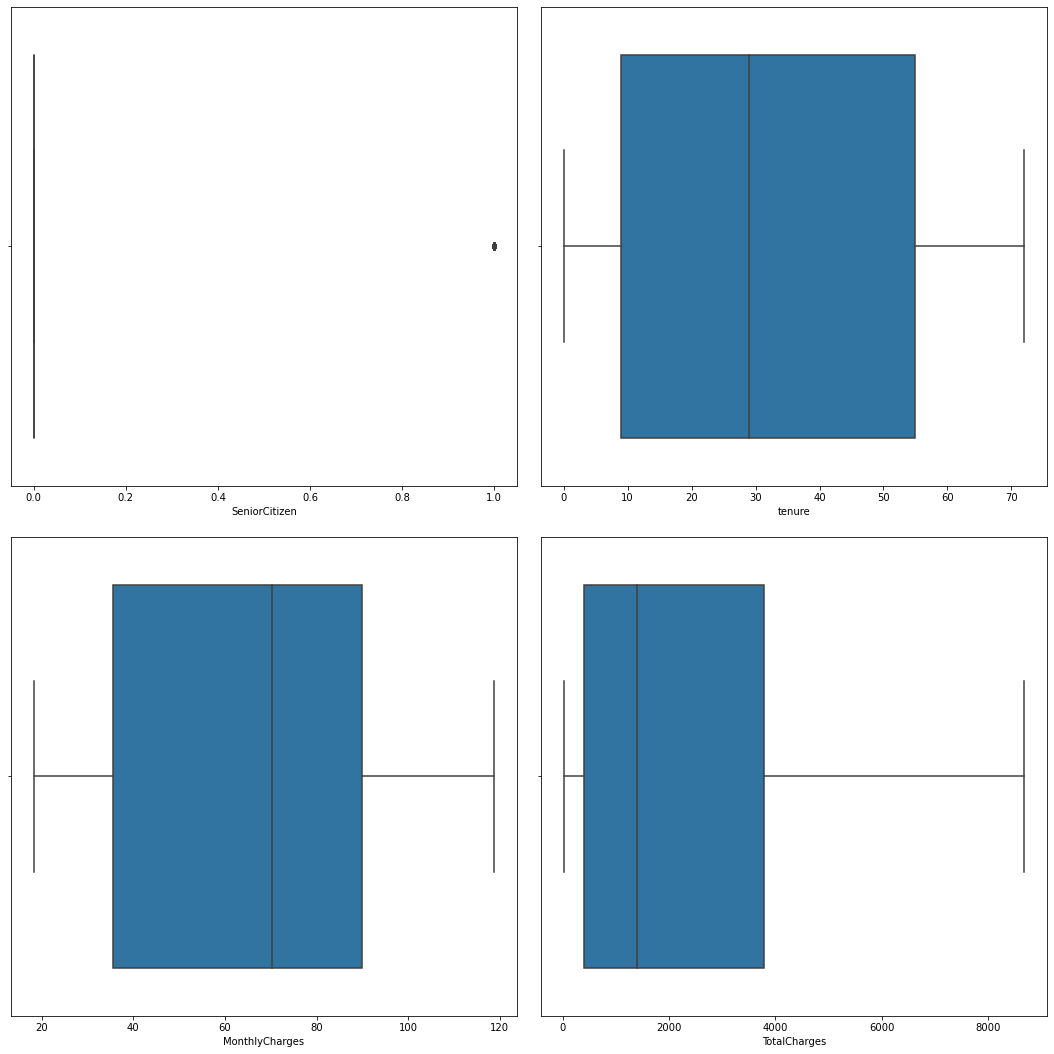

In [21]:
import seaborn as sns
plt.figure(figsize=(15,15))
for index,cols in enumerate(num_data):
  plt.subplot(2,2,index+1)
  sns.boxplot(df.loc[:,cols],)
plt.tight_layout(pad=2)

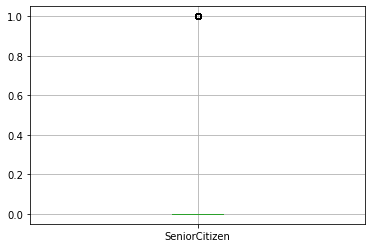

In [22]:
plt.show(num_data.boxplot("SeniorCitizen"))

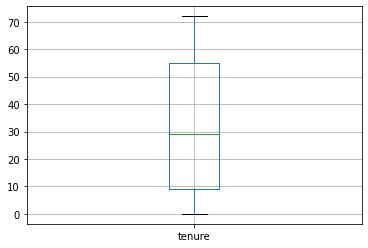

In [23]:
plt.show(num_data.boxplot("tenure"))

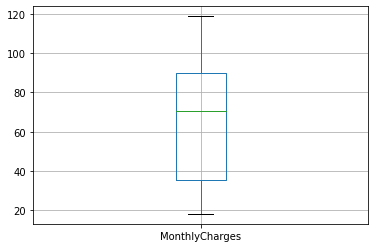

In [24]:
plt.show(num_data.boxplot("MonthlyCharges"))

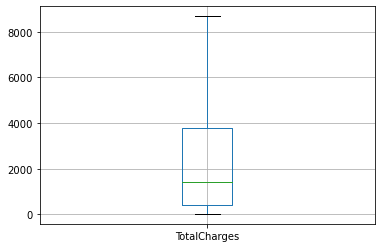

In [25]:
plt.show(num_data.boxplot("TotalCharges"))

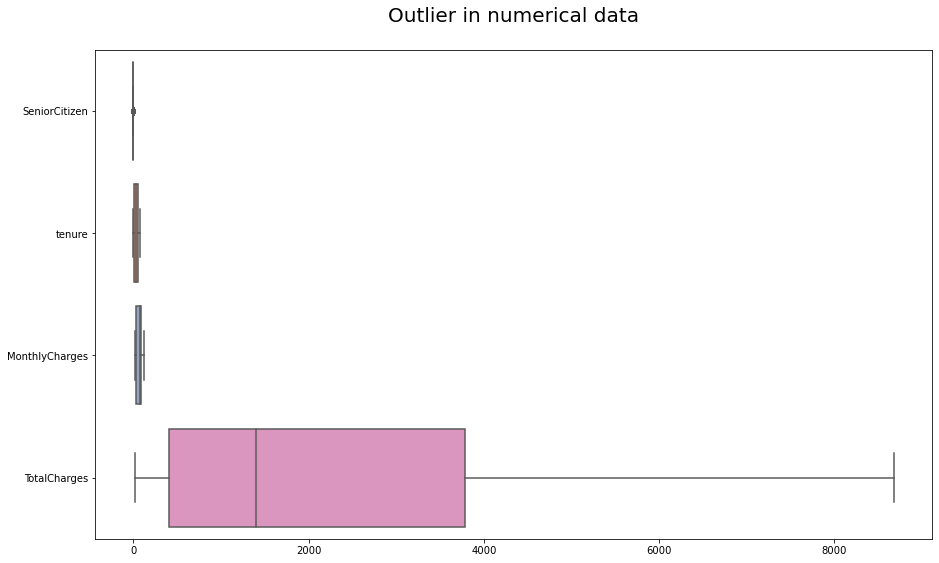

In [26]:
plt.figure(figsize=(15,9))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

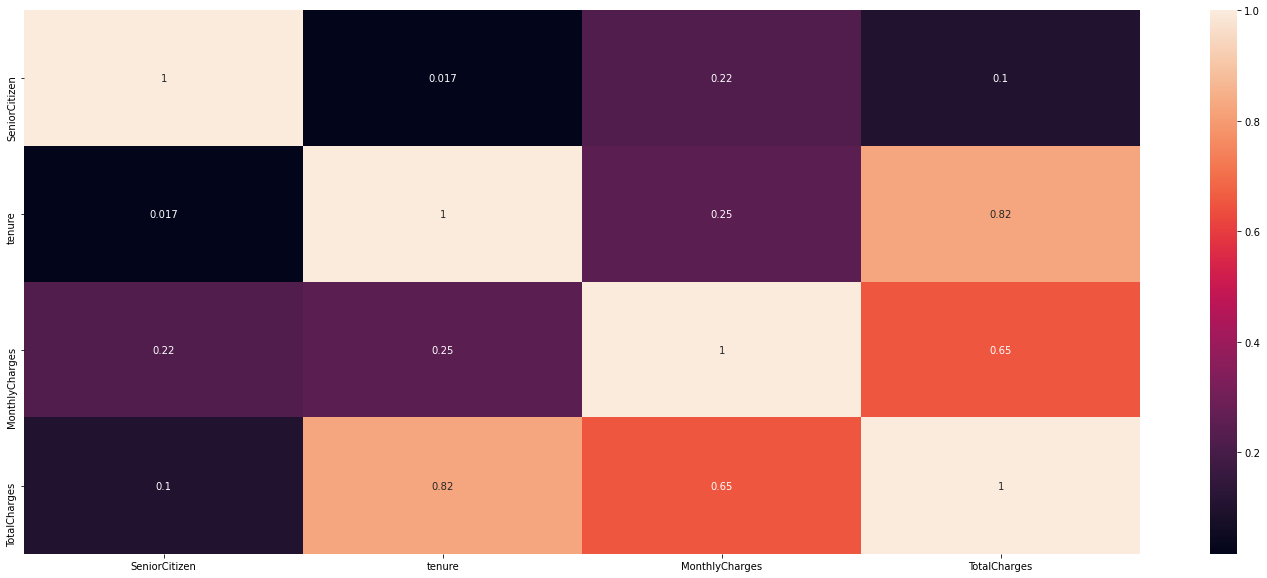

In [27]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")

In [29]:
profile

# handaling the object type data

In [30]:
obj_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [31]:
obj_data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [32]:
num_data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


# Basic visualisation of the data

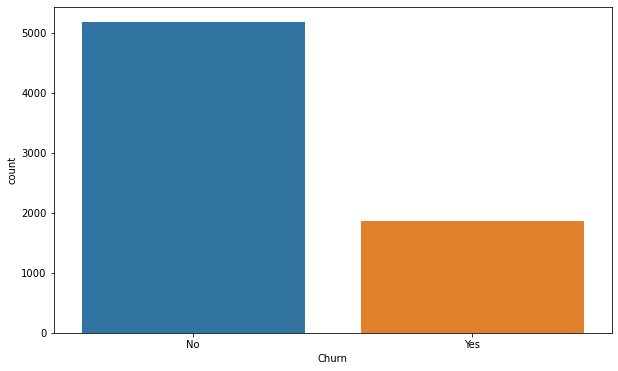

In [33]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Churn')
plt.show()

### Most people do not leave the service

In [34]:
#What percentage of customers are leaving ?
retained = df[df.Churn == 'No']
churned = df[df.Churn == 'Yes']
num_retained = retained.shape[0]
num_churned = churned.shape[0]
#Print the percentage of customers that stayed and left
print( num_retained / (num_retained + num_churned) * 100 , "% of customers stayed with the company.")
#Print the percentage of customers that stayed and left
print( num_churned / (num_retained + num_churned) * 100,"% of customers left the company.")

73.4630129206304 % of customers stayed with the company.
26.536987079369588 % of customers left the company.


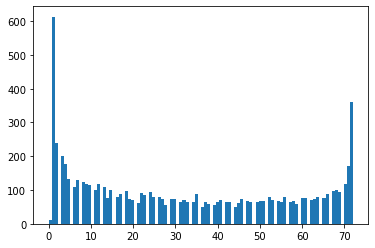

In [35]:
# Visualize the distribution of 'tenure'
plt.hist(df['tenure'], bins = 100)
  
# Display the plot
plt.show()

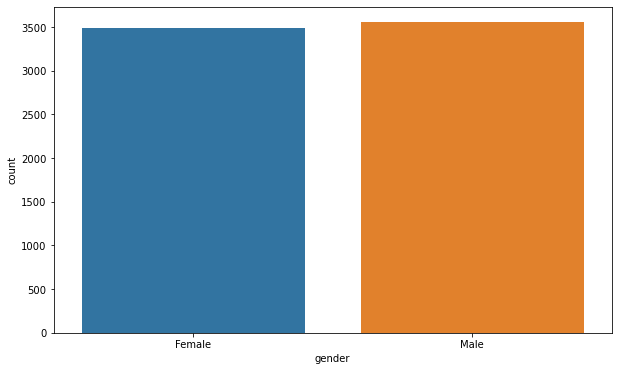

In [36]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'gender')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

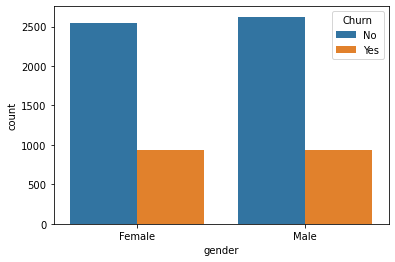

In [37]:
#Visualize the churn count for both Males and Females
sns.countplot(x='gender', hue='Churn',data = df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

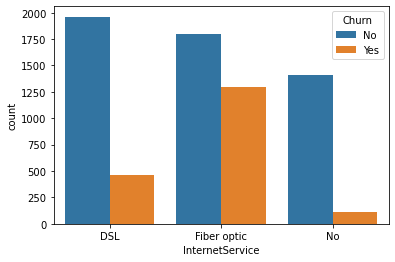

In [38]:
#Visualize the churn count for the internet service
sns.countplot(x='InternetService', hue='Churn', data = df)

# Data Processing & Cleaning

In [39]:
#Remove the unnecessary column customerID
df_new = df = df.drop('customerID', axis=1)

In [40]:
#Look at the number of rows and cols in the new data set
df_new.shape

(7043, 20)

In [41]:
obj_data_new=df_new.select_dtypes(include=['object'])

In [42]:
obj_data_new.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Label Encoding
#### ML algorithm dont process with object type data so we have to convert object type data into numerical type data.

In [43]:
#LabelEncoder()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_new['gender'] = label_encoder.fit_transform(df_new['gender'])
df_new['Partner'] = label_encoder.fit_transform(df_new['Partner'])
df_new['Dependents'] = label_encoder.fit_transform(df_new['Dependents'])
df_new['PhoneService'] = label_encoder.fit_transform(df_new['PhoneService'])
df_new['MultipleLines'] = label_encoder.fit_transform(df_new['MultipleLines'])
df_new['InternetService'] = label_encoder.fit_transform(df_new['InternetService'])
df_new['OnlineSecurity'] = label_encoder.fit_transform(df_new['OnlineSecurity'])
df_new['OnlineBackup'] = label_encoder.fit_transform(df_new['OnlineBackup'])
df_new['DeviceProtection'] = label_encoder.fit_transform(df_new['DeviceProtection'])
df_new['TechSupport'] = label_encoder.fit_transform(df_new['TechSupport'])
df_new['StreamingTV'] = label_encoder.fit_transform(df_new['StreamingTV'])
df_new['StreamingMovies'] = label_encoder.fit_transform(df_new['StreamingMovies'])
df_new['Contract'] = label_encoder.fit_transform(df_new['Contract'])
df_new['PaperlessBilling'] = label_encoder.fit_transform(df_new['PaperlessBilling'])
df_new['PaymentMethod'] = label_encoder.fit_transform(df_new['PaymentMethod'])
df_new['Churn'] = label_encoder.fit_transform(df_new['Churn'])

In [44]:
#Check the new data set data types
df_new.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

In [45]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [46]:
df_new.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1
7042,1,0,0,0,66,1,0,1,2,0,2,2,2,2,2,1,0,105.65,6844.50,0


In [47]:
# defing Independent variables as X
X = df_new.iloc[:,:-1]
# Defing Target variable or dependent variable
y = df_new.iloc[:,-1]
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [48]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
#Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5634, 19) (5634,)
Test set: (1409, 19) (1409,)


## To scale features of the training and test sets

In [51]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression model

In [53]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred_slr=slr.predict(X_test)
y_pred_slr

array([ 0.45563353,  0.16060431, -0.04927993, ...,  0.05834782,
        0.06510151,  0.40587121])

In [57]:
#Root mean square
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pred_slr, y_test)
rmse=np.sqrt(mse)
rmse

0.3683204505198418

## #rmse value is high so this Linear regression model is not good. if rmse value is less than 10 we can consider this model

## Random Forest classifier 

In [86]:

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Instantiate the classifier
clf = RandomForestClassifier()
  
# Fit to the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

### Evaluting Model

In [88]:
# Compute accuracy
from sklearn.metrics import accuracy_score
  
print('The Accuracy score of Randam forest classifier for customer churn:', accuracy_score(y_test, y_pred))

The Accuracy score of Randam forest classifier for customer churn: 0.7920511000709723


In [89]:
#Check precision, recall, f1-score
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



## DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier()
classifier.fit(X_train,y_train)

y_pred_clf = classifier.predict(X_test)
y_pred_clf

array([1, 0, 0, ..., 0, 0, 1])

In [62]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred_clf))
print('The Accuracy score of DecisionTreeClassifier for customer churn:',accuracy_score(y_test,y_pred_clf))

[[843 193]
 [188 185]]
The Accuracy score of DecisionTreeClassifier for customer churn: 0.7295954577714692


## Navie Bayes

In [74]:
# import sklearn packages
from sklearn.naive_bayes import GaussianNB

In [75]:
#Create the model
nb = GaussianNB()
#Train the model
nb.fit(X_train, y_train)

GaussianNB()

In [76]:
y_pred_nb = nb.predict(X_test)
#printing the predictions
print(y_pred_nb)

[1 0 0 ... 0 0 1]


In [77]:
print('The Accuracy score of Navie Bays for customer churn:', accuracy_score(y_test,y_pred_nb))

The Accuracy score of Navie Bays for customer churn: 0.7579843860894251


## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression

In [65]:
#Create the model
model = LogisticRegression()
#Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred_lgr = model.predict(X_test)
#printing the predictions
print(y_pred_lgr)

[1 0 0 ... 0 0 1]


In [68]:
print('The Accuracy score of Logistic Regerssion for customer churn:', accuracy_score(y_test,y_pred_lgr))

The Accuracy score of Logistic Regerssion for customer churn: 0.8161816891412349


In [69]:
#Check precision, recall, f1-score
print(classification_report(y_test, y_pred_lgr) )

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



From the report, I can see that the recall of the model is about 90% meaning the model correctly identified about 90% of the customers that were retained and missed about 10%.
The precision of the model was about 86% and the f1-score was about 88%. The accuracy of the model was about 82% which is better than the 73.46% that I could’ve done just by guessing a customer would always stay with the company.

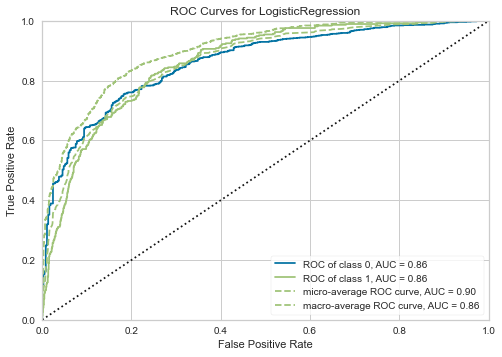

In [81]:
from yellowbrick.classifier import ROCAUC

# Instaniate the classification model and visualizer
model = LogisticRegression()

visualizer = ROCAUC(model) #model=ec1

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                 
plt.show()
# Finalize and render the figure

In [90]:
print(f"\033[1m Random Forest clasifier accuracy_score : {round(accuracy_score(y_test,y_pred)*100,2)} %\n")
print(f"\033[1m DecisionTreeClassifier accuracy_score : {round(accuracy_score(y_test,y_pred_clf)*100,2)} %\n")
print(f"\033[1m Navie Bayes accuracy_score : {round(accuracy_score(y_test,y_pred_nb)*100,2)} %\n")
print(f"\033[1m Logistic Regression accuracy_score : {round(accuracy_score(y_test,y_pred_lgr)*100,2)} %\n")



 Random Forest clasifier accuracy_score : 79.21 %

 DecisionTreeClassifier accuracy_score : 72.96 %

 Navie Bayes accuracy_score : 75.8 %

 Logistic Regression accuracy_score : 81.62 %



#### Insights:
##### Logistic Regression model still achieves high scores on all the chosen metrics when it applies on the test set.

#### Conclusion:
##### Logistic Regression is chosen as the predictive model for Customer Churn due to its good performance and simplicity